In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# some imports to set up plotting 
import matplotlib.pyplot as plt
import seaborn as sns

This Case study is prepared by <font color="darkgreen"><b>Rocky Jagtiani</b></font> (https://www.linkedin.com/in/rocky-jagtiani-3b390649/) for <font color="darkblue"><b>learners at the Data Folkz</b></font>.

Analyzing a dataset on the churn rate of telecom operator clients.
--

<h3><font color='green'><b>First of all; let me tell you that you all have been doing fantastic.</b></font></h3>



In [ ]:
# Steps to upload any dataset into your Colab NB :
# step 1 : First Download the dataset to your local PC. 
#          The link for downloading our dataset for practicing is https://drive.google.com/open?id=1vmVKLJc3iLw-svANZd3v6iTNxdjOXfM_
# step 2 : Run the below code and select the (above downloaded) dataset. 
from google.colab import files
files.upload()

Saving telecom_churn_dataset.csv to telecom_churn_dataset.csv


{'telecom_churn_dataset.csv': b'State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn\nKS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False\nOH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False\nNJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False\nOH,84,408,Yes,No,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False\nOK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False\nAL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False\nMA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False\nMO,147,415,Yes,No,0,157.0,79,26.69,1

In [ ]:
# load the dataset and view first 5 rows
df = pd.read_csv('telecom_churn_dataset.csv')
df.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

In [ ]:
# data dimensionality, feature names, and feature types
print(df.shape)
print("-----------------------------")
print(df.columns)
print("-----------------------------")
df.info()

(3333, 20)
-----------------------------
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null

We see that one feature is ``logical (bool)``, ``3 features are of type object``, and ``16 features are numeric``. There are ``no null or NaN`` because each column contains 3333 observations, the same number of rows we saw before with shape.

Let's change the column type of ``Churn feature`` to ``int64``:

In [ ]:
# converting datatype of Churn from bool to int64
df['Churn'] = df['Churn'].astype('int64')
df['Churn'].dtype

dtype('int64')

The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [ ]:
df.describe()

Account length    Area code  ...  Customer service calls        Churn
count     3333.000000  3333.000000  ...             3333.000000  3333.000000
mean       101.064806   437.182418  ...                1.562856     0.144914
std         39.822106    42.371290  ...                1.315491     0.352067
min          1.000000   408.000000  ...                0.000000     0.000000
25%         74.000000   408.000000  ...                1.000000     0.000000
50%        101.000000   415.000000  ...                1.000000     0.000000
75%        127.000000   510.000000  ...                2.000000     0.000000
max        243.000000   510.000000  ...                9.000000     1.000000

[8 rows x 17 columns]

In [ ]:
# In order to see statistics on non-numerical features, 
# one has to explicitly indicate data types of interest 
# in the include parameter.



For categorical (type object) and boolean (type bool) features we can use the value_counts method. Let’s have a look at the distribution of Churn:

In [ ]:
## find distribution of Churn.
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 users out of 3333 are loyal; their Churn value is 0. To calculate fractions, pass **normalize=True** to the value_counts function.

In [ ]:
df['Churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

**Sorting**

> A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by Total day charge (use ascending=False to sort in descending order):

In [ ]:
df.sort_values(by='Total day charge', ascending=False).head()

State  Account length  ...  Customer service calls Churn
365     CO             154  ...                       1     1
985     NY              64  ...                       1     1
2594    OH             115  ...                       1     1
156     OH              83  ...                       0     1
605     MO             112  ...                       2     1

[5 rows x 20 columns]

In [ ]:
# We can also sort by multiple columns:
# sort by 'Churn' in ascending order and then on 'Total day charge' by descending order
df.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()

State  Account length  ...  Customer service calls Churn
688     MN              13  ...                       3     0
2259    NC             210  ...                       3     0
534     LA              67  ...                       4     0
575     SD             114  ...                       1     0
2858    AL             141  ...                       1     0

[5 rows x 20 columns]

Questions  -- start from here -- :
--

In [ ]:
# Q1 > what is the proportion of churned users in our dataframe?



# ans + observation  : 14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt. 

In [ ]:
# Q2 > What are average values of all numerical features for churned users? 
# Hint : df[df['Churn'] == 1] would give all churned customer rows



In [ ]:
# Q3 >How much time (on average) do churned users spend on the phone during daytime?



In [ ]:
# Q4 > What is the maximum length of international calls among loyal users 
# (Churn == 0) who do not have an international plan?



**Important**

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The ``loc`` method is used for indexing by name, while ``iloc()`` is used for indexing by number.

In the first case below, we say "give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)". In the second case, we say "give us the values of the first five rows in the first three columns" (as in a typical Python slice: the maximal value is not included).

In [ ]:
df.loc[0:5, 'State':'Area code']

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

In [ ]:
df.iloc[0:5, 0:3]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415

In [ ]:
# If we need the first or the last line of the data frame, 
# we can use the df[:1] or df[-1:] construct:

df[-1:] # fetches last line

State  Account length  ...  Customer service calls Churn
3332    TN              74  ...                       0     0

[1 rows x 20 columns]

**Applying Functions to Cells, Columns and Rows**

To apply functions to each column, use ``apply()`` :

In [ ]:
# for e.g. try this :
df.apply(np.max)  # would find max value for each column

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes           20
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [ ]:
# Q5 > select all states starting with W.  
# Hint : use Lambda functions
# https://stackoverflow.com/questions/34962104/pandas-how-can-i-use-the-apply-function-for-a-single-column




In [ ]:
# The map method can be used to replace values in a column 
# by passing a dictionary of the form {old_value: new_value} as its argument:

# Q6 > For the "International plan" column replace 'No' -> False and 'Yes' -> True



In [ ]:
# The same thing as for map(), can be done with the replace method also.

# Q7 > Use replace() and replace 'No' -> False and 'Yes' -> True 
#      for "Voice mail plan" column
# Reference : https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value




**Grouping**

In general, grouping data in Pandas works as follows:

> df.groupby(by=grouping_columns)[columns_to_show].function()

First, the groupby method divides the ``grouping_columns`` by their values. They become a new index in the resulting dataframe.

Then, columns of interest are selected ``(columns_to_show)``. If columns_to_show is not included, all non groupby columns will be included.

Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the Churn variable and display statistics of three columns in each group:

In [ ]:
# example : group the data according to the values of the Churn variable 
# and display statistics of three columns in each group:

columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

# percentiles=[] supresses calculation of 25%ile and 75%ile

Total day minutes                         ... Total night minutes               
                  count        mean        std  ...                 min     50%    max
Churn                                           ...                                   
0                2850.0  175.175754  50.181655  ...                23.2  200.25  395.0
1                 483.0  206.914079  68.997792  ...                47.4  204.80  354.9

[2 rows x 18 columns]

In [ ]:
# Let’s do the same thing, but slightly differently 
# by passing a list of functions to agg():

columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min,np.max])

Total day minutes                  ... Total night minutes             
                   mean        std amin  ...                 std  amin   amax
Churn                                    ...                                 
0            175.175754  50.181655  0.0  ...           51.105032  23.2  395.0
1            206.914079  68.997792  0.0  ...           47.132825  47.4  354.9

[2 rows x 12 columns]

**Summary tables**

Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a ``contingency table`` using the ``crosstab method``:

In [ ]:
pd.crosstab(df['Churn'], df['International plan'])

International plan    No  Yes
Churn                        
0                   2664  186
1                    346  137

In [ ]:
# Q8 > plot a contigency table using crosstab() of 'churn'  vs. 'Voice mail plan'
# add an attribute normalize=True to crosstab().  



**We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).**

> This will resemble pivot tables to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the **pivot_table** method takes the following parameters:

**values** – a list of variables to calculate statistics for,

**index** – a list of variables to group data by,

**aggfunc** – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

**Let’s take a look at the average number of day, evening, and night calls by area code:**

In [ ]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

Total day calls  Total eve calls  Total night calls
Area code                                                     
408             100.496420        99.788783          99.039379
415             100.576435       100.503927         100.398187
510             100.097619        99.671429         100.601190

**DataFrame transformations**

Like many other things in Pandas, adding columns to a DataFrame is very much possible.

Calculate the total number of calls for all users, let’s create the total_calls Series and paste it into the DataFrame. 

In [ ]:
# Q 9 > Calculate the total number of calls for all users.
# Hint 1 : total_calls = Total day calls + Total eve calls + Total night calls + Total intl calls
# Hint 2 : df['total_calls'] is the new column



To **delete columns or rows**, use the ``drop`` method, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). The ``inplace`` argument tells whether to change the original DataFrame. With **inplace=False**, the drop method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With **inplace=True**, it alters the DataFrame.

In [ ]:
# Q 10 > Get rid of just created column namely 'total calls'



# for example :
# and here’s how you can delete rows
# df.drop([1, 2]).head() 

In [ ]:
# Q 11_A >  plot a contigency table using crosstab() of 'churn'  vs. 'International plan' 
# add an attribute margins=True to crosstab()  -> this would give you 
#                                            row-wise and column-wise total 




# Q 11_B > Plot a vertical bar graph showing count of customers 
# using 'International Plan' under both the churn categories. 
# ( Hint : use sns.countplot function )



``Observation`` : We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

In [ ]:
# 12_A > plot a contigency table using crosstab() of 'churn'  vs. 'Customer service calls' 
# add an attribute margins=True to crosstab(). 

 

In [ ]:
# Q 12_B > Plot a vertical bar graph showing count of customers 
# using 'Customer service calls' under both the churn categories. 



``Observation`` : Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

**Add a binary feature to our DataFrame** – ``Customer service calls > 3``. 
And once again, let's see how it relates to churn.

In [ ]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn                  0    1   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

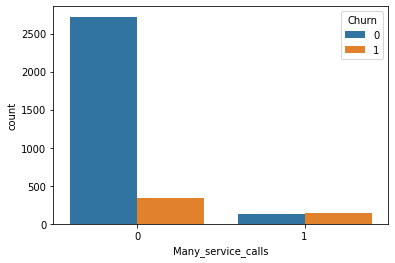

In [ ]:
# plot 'Many_service_calls'  vs. 'Churn'

sns.countplot(x='Many_service_calls', hue='Churn', data=df);

In [ ]:
# Q 13> Construct another contingency table that relates Churn 
# with both International plan and freshly created Many_service_calls.



**``Conclusion``** : 

**Let's recap what we've learned through this assignment:**
The share of loyal clients in the sample is ~ 85%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85% of all cases. 

That is, the proportion of correct answers (accuracy) of subsequent models should be no less than this number, and will hopefully be significantly higher; With the help of a simple forecast that can be expressed by the following formula: 

`"International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of ~85%`

<h3><b><font color='green'>Bravo.. You have successfully completed the learning & application part of </font> Python Libraries for Data Science </b></h3>

